#### Import Libraries

In [200]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
from numpy import random
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sc
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox

In [201]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

#### Reading Data 

In [202]:
# load original data path

path = "Data_Marketing_Customer_Analysis_Round2.csv"

In [203]:
# import function 

def load_original_data (path):
    return pd.read_csv(path)

In [204]:
cs_df = load_original_data(path)

## Function Cockpit

#### Standardizing Columns

In [205]:
# apply lower case for column names

def lower_case_column_names (cs_df):
    cs_df.columns = [i.lower() for i in cs_df.columns]
    return cs_df

#### Renaming Columns

In [206]:
def rename_columns(cs_df):
    cs_df.rename(columns = {"Customer Lifetime Value": "Customer_Lifetime_Value"}, inplace = True)
    return cs_df

In [207]:
def underscore_column_names (cs_df):
    cs_df.columns = [i.replace(" ", "_")for i in cs_df.columns]
    return cs_df

#### Dropping Columns

In [208]:
def drop_columns(cs_df):
    cs_df.drop(columns =["customer","unnamed:_0"], inplace = True)
    return cs_df

In [209]:
def drop_duplicates(cs_df):
    cs_df.drop_duplicates()
    return cs_df

# drop duplicates only across a subset of columns:
# df.drop_duplicates(subset=["gender", "state"])

#### Replacing Null Values

In [212]:
#Replacing null values
def fill_null(df):
    df["number_of_open_complaints"] = df["number_of_open_complaints"].fillna(value=0)
    mean_months = round(df["months_since_last_claim"].mean())
    df["months_since_last_claim"] = df["months_since_last_claim"].fillna(value=mean_months)
    mean_income = round(df["income"].mean())
    df["income"] = df["income"].fillna(value=mean_income)
    return df

In [211]:
def drop_null(df):
    cs_df.dropna()
    return cs_df

#### Round Decimals

In [238]:
cs_df["total_claim_amount"]=round(cs_df["total_claim_amount"],0)
cs_df["customer_lifetime_value"]=round(cs_df["customer_lifetime_value"],0)

#### Rearranging Columns and Duplicates

In [146]:
#def rearrange_columns(cs_df):
    #cs_df.columns = cs_df[['state', 'gender', 'education', 'income', 'employmentstatus', 'effective_to_date', 'customer_lifetime_value', 'response', 'coverage',
       #'location_code', 'marital_status', 'monthly_premium_auto',
       #'months_since_last_claim', 'months_since_policy_inception',
      #'number_of_open_complaints', 'number_of_policies', 'policy_type',
       #'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       #'vehicle_class', 'vehicle_size', 'vehicle_type']]
    

## Pipeline Controller

In [213]:
cs_df =(load_original_data(path = "Data_Marketing_Customer_Analysis_Round2.csv")
.pipe(lower_case_column_names)
.pipe(rename_columns)
.pipe(underscore_column_names)
.pipe(drop_columns)
.pipe(drop_duplicates)
.pipe(fill_null)
.pipe(drop_null))
#.pipe(rearrange_columns)

In [214]:
cs_df = load_original_data(path)
cs_df = lower_case_column_names(cs_df) 
cs_df = rename_columns(cs_df) 
cs_df = underscore_column_names(cs_df) 
cs_df = drop_columns(cs_df)
cs_df = drop_duplicates(cs_df)
cs_df = fill_null(cs_df)
cs_df = drop_null(cs_df)
#cs_df = rearrange_columns(cs_df)

## Viewing Data 

In [215]:
# settings to display all columns

pd.set_option("display.max_columns", None)
cs_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,15.0,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [216]:
# getting info about the new data frame. 

# i.e. there are floating data type, integers and objects (i.e. strings)

print(cs_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          10279 non-null  object 
 1   customer_lifetime_value        10910 non-null  float64
 2   response                       10279 non-null  object 
 3   coverage                       10910 non-null  object 
 4   education                      10910 non-null  object 
 5   effective_to_date              10910 non-null  object 
 6   employmentstatus               10910 non-null  object 
 7   gender                         10910 non-null  object 
 8   income                         10910 non-null  int64  
 9   location_code                  10910 non-null  object 
 10  marital_status                 10910 non-null  object 
 11  monthly_premium_auto           10910 non-null  int64  
 12  months_since_last_claim        10910 non-null 

In [217]:
# list current column names

cs_df.columns

Index(['state', 'customer_lifetime_value', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')

## Rearranging Columns

In [218]:
# rearraning columns in order the data to be more comprehensiv 

cs_df = cs_df[['state','gender','customer_lifetime_value','number_of_open_complaints','response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'vehicle_type']]

## Correcting Data Types in Columns

In [219]:
# Check the data types of all the columns and fix the incorrect ones 
# The main method to convert a column to another data type is: astype()
# df["Customer Lifetime Value"].astype(float)
# (in previous Lab it was for customer lifetime value and number of complaints )

cs_df.dtypes

state                             object
gender                            object
customer_lifetime_value          float64
number_of_open_complaints        float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
vehicle_type                      object
dtype: object

In [220]:
cs_df.customer_lifetime_value.dtype

dtype('float64')

In [221]:
cs_df.number_of_open_complaints.dtype

dtype('float64')

In [222]:
cs_df.income.dtype

dtype('int64')

In [223]:
# "income" change from integer to float

cs_df["income"].astype(float)

0        48029.0
1            0.0
2        22139.0
3        49078.0
4        23675.0
          ...   
10905        0.0
10906    61146.0
10907    39837.0
10908    64195.0
10909        0.0
Name: income, Length: 10910, dtype: float64

In [224]:
cs_df.income = cs_df["income"].astype(float)

In [225]:
cs_df.income.dtype

dtype('float64')

## Filtering Data

In [226]:
# Filter the data in state and gender column to standardize the texts in those columns

cs_df.gender.value_counts(dropna=False)

# No need to correct typos in gender in the file Data_Marketing_Customer_Analysis_Round2. All indices already assigned to F or M 

F    5573
M    5337
Name: gender, dtype: int64

FYI How correction of gender works:

def gender_cl(x):

if not x == x:
    return "n"

else:
    dct_ = {"Male": "M",
       "female": "F" ,
       "Femal": "F" ,
        "F": "F" ,
        "M": "M"}

    return dct_[x]

gender_cl("Femal")

cs_df["gender"] = cs_df["gender"].apply(gender_cl)

cs_df["gender"].value_counts()


In [227]:
# .value_counts() doesn't show the null values. dropna=False shows null values. 
# There are 631 rows that have no answer for "state"
# No need to correct typos in state in the file Data_Marketing_Customer_Analysis_Round2. All indices already assigned

cs_df.state.value_counts(dropna=False)

California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
NaN            631
Name: state, dtype: int64

In [228]:
cs_df["state"].unique()

array(['Arizona', 'California', 'Washington', 'Oregon', nan, 'Nevada'],
      dtype=object)

FYI How filter & correction of state works:

def state_cl(x):

if not x==x:
    # then I know, that x is NaN
    return x
else:
    dct_ = {'Washington': 'WA',
           'Arizona':'AZ',
           'Nevada': 'NV',
           'California':'CA',
           'Oregon':'OR',
           'Cali':'CA',
           'AZ':'AZ',
           'WA':'WA'}

    return dct_[x]

state_cl("WA)

cs_df["state"] = cs_df["state"].apply(state_cl)


In [229]:
# check for "education". 
# Data in file Data_Marketing_Customer_Analysis_Round2 is clean and has no typos (also checked for employmentstatus)

cs_df.education.value_counts(dropna=False)

Bachelor                3272
College                 3204
High School or Below    3146
Master                   887
Doctor                   401
Name: education, dtype: int64

## Activity 2 

## Bucketing Data

In [230]:
# Replace column "state" to different zones. 
# California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central

In [245]:
def state_group(x):
    # checking for NaN. If x is NaN, return x
    if not x==x:
        return x
    
    else:

        dct_ = {"Washington":"east",
                "Arizona":"central",
                "Nevada": "central",
                "California":"west_region",
                "Oregon":"north_west",
               }
        
        return dct_[x]

cs_df["region"] = cs_df["state"].apply(state_group)

In [246]:
cs_df[["region", "state"]]

,region,state
0,central,Arizona
1,west_region,California
2,east,Washington
3,north_west,Oregon
4,north_west,Oregon
...,...,...
10905,central,Nevada
10906,north_west,Oregon
10907,central,Arizona
10908,west_region,California


In [247]:
cs_df["region"].unique()

array(['central', 'west_region', 'east', 'north_west', nan], dtype=object)

In [234]:
# Alternative for bucketing states to zones unsing map_function: 

cs_df["region_mapped"] = list(map(state_group, cs_df["state"]))

In [235]:
cs_df[["region_mapped", "region", "state"]]

,region_mapped,region,state
0,central,central,Arizona
1,west_region,west_region,California
2,east,east,Washington
3,north_west,north_west,Oregon
4,north_west,north_west,Oregon
...,...,...,...
10905,central,central,Nevada
10906,north_west,north_west,Oregon
10907,central,central,Arizona
10908,west_region,west_region,California


In [236]:
# drop empty region column

cs_df = cs_df.drop(columns="region")

## Activity 3

## Numerical Columns

In [38]:
# Check if the Index only consists of numeric data

In [244]:
cs_df_numerics_only = cs_df.select_dtypes(include=np.number)
cs_df_numerics_only

# in this dataframe there are 8 numerical columns

# Or use: 
# df.select_dtypes(include="number")

,customer_lifetime_value,number_of_open_complaints,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount
0,4809.0,0.0,48029.0,61,7.0,52,9,293.0
1,2229.0,0.0,0.0,64,3.0,26,1,745.0
2,14948.0,0.0,22139.0,100,34.0,31,2,480.0
3,22332.0,0.0,49078.0,97,10.0,3,2,484.0
4,9025.0,0.0,23675.0,117,15.0,31,7,708.0
...,...,...,...,...,...,...,...,...
10905,15563.0,0.0,0.0,253,15.0,40,7,1214.0
10906,5259.0,0.0,61146.0,65,7.0,68,6,273.0
10907,23893.0,0.0,39837.0,201,11.0,63,2,381.0
10908,11972.0,4.0,64195.0,158,0.0,27,6,618.0


In [240]:
cs_df.select_dtypes(exclude = ["object"])

,customer_lifetime_value,number_of_open_complaints,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount
0,4809.0,0.0,48029.0,61,7.0,52,9,293.0
1,2229.0,0.0,0.0,64,3.0,26,1,745.0
2,14948.0,0.0,22139.0,100,34.0,31,2,480.0
3,22332.0,0.0,49078.0,97,10.0,3,2,484.0
4,9025.0,0.0,23675.0,117,15.0,31,7,708.0
...,...,...,...,...,...,...,...,...
10905,15563.0,0.0,0.0,253,15.0,40,7,1214.0
10906,5259.0,0.0,61146.0,65,7.0,68,6,273.0
10907,23893.0,0.0,39837.0,201,11.0,63,2,381.0
10908,11972.0,4.0,64195.0,158,0.0,27,6,618.0


In [248]:
cs_df.select_dtypes("number").columns

Index(['customer_lifetime_value', 'number_of_open_complaints', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

## Categorical Colums

In [42]:
# it is possible to change strings to categories in order to range

In [249]:
cs_df.select_dtypes("category").columns

Index([], dtype='object')

In [250]:
catCols = [col for col in cs_df.columns if cs_df[col].dtype=="O"]
catCols

['state',
 'gender',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type',
 'region_mapped',
 'region']

## NaN Values

In [45]:
# Pandas represents missing values as NaN (Not a Number). It comes from Numpy and is of type float64.
# NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike

In [251]:
cs_df.isnull()

,state,gender,customer_lifetime_value,number_of_open_complaints,response,coverage,education,effective_to_date,employmentstatus,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,region_mapped,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10906,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10907,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
10908,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [252]:
pd.isna(cs_df)

,state,gender,customer_lifetime_value,number_of_open_complaints,response,coverage,education,effective_to_date,employmentstatus,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,region_mapped,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10906,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10907,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
10908,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [253]:
cs_df.fillna("0", inplace = True)
cs_df

,state,gender,customer_lifetime_value,number_of_open_complaints,response,coverage,education,effective_to_date,employmentstatus,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,region_mapped,region
0,Arizona,M,4809.0,0.0,No,Basic,College,2/18/11,Employed,48029.0,Suburban,Married,61,7.0,52,9,Corporate Auto,Corporate L3,Offer3,Agent,293.0,Four-Door Car,Medsize,0,central,central
1,California,F,2229.0,0.0,No,Basic,College,1/18/11,Unemployed,0.0,Suburban,Single,64,3.0,26,1,Personal Auto,Personal L3,Offer4,Call Center,745.0,Four-Door Car,Medsize,0,west_region,west_region
2,Washington,M,14948.0,0.0,No,Basic,Bachelor,2/10/11,Employed,22139.0,Suburban,Single,100,34.0,31,2,Personal Auto,Personal L3,Offer3,Call Center,480.0,SUV,Medsize,A,east,east
3,Oregon,M,22332.0,0.0,Yes,Extended,College,1/11/11,Employed,49078.0,Suburban,Single,97,10.0,3,2,Corporate Auto,Corporate L3,Offer2,Branch,484.0,Four-Door Car,Medsize,A,north_west,north_west
4,Oregon,F,9025.0,0.0,No,Premium,Bachelor,1/17/11,Medical Leave,23675.0,Suburban,Married,117,15.0,31,7,Personal Auto,Personal L2,Offer1,Branch,708.0,Four-Door Car,Medsize,0,north_west,north_west
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,F,15563.0,0.0,No,Premium,Bachelor,1/19/11,Unemployed,0.0,Suburban,Married,253,15.0,40,7,Personal Auto,Personal L1,Offer3,Web,1214.0,Luxury Car,Medsize,A,central,central
10906,Oregon,F,5259.0,0.0,No,Basic,College,1/6/11,Employed,61146.0,Urban,Married,65,7.0,68,6,Personal Auto,Personal L3,Offer2,Branch,273.0,Four-Door Car,Medsize,A,north_west,north_west
10907,Arizona,F,23893.0,0.0,No,Extended,Bachelor,2/6/11,Employed,39837.0,Rural,Married,201,11.0,63,2,Corporate Auto,Corporate L3,Offer1,Web,381.0,Luxury SUV,Medsize,0,central,central
10908,California,F,11972.0,4.0,No,Premium,College,2/13/11,Employed,64195.0,Urban,Divorced,158,0.0,27,6,Personal Auto,Personal L1,Offer1,Branch,618.0,SUV,Medsize,A,west_region,west_region


## Datetime Format

In [49]:
# Extract the months from the dataset and store in a separate column. 
# Then filter the data to show only the information for the first quarter , ie. January, February and March. 

In [254]:
# settings to display all columns

pd.set_option("display.max_columns", None)
cs_df.head()

,state,gender,customer_lifetime_value,number_of_open_complaints,response,coverage,education,effective_to_date,employmentstatus,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,region_mapped,region
0,Arizona,M,4809.0,0.0,No,Basic,College,2/18/11,Employed,48029.0,Suburban,Married,61,7.0,52,9,Corporate Auto,Corporate L3,Offer3,Agent,293.0,Four-Door Car,Medsize,0,central,central
1,California,F,2229.0,0.0,No,Basic,College,1/18/11,Unemployed,0.0,Suburban,Single,64,3.0,26,1,Personal Auto,Personal L3,Offer4,Call Center,745.0,Four-Door Car,Medsize,0,west_region,west_region
2,Washington,M,14948.0,0.0,No,Basic,Bachelor,2/10/11,Employed,22139.0,Suburban,Single,100,34.0,31,2,Personal Auto,Personal L3,Offer3,Call Center,480.0,SUV,Medsize,A,east,east
3,Oregon,M,22332.0,0.0,Yes,Extended,College,1/11/11,Employed,49078.0,Suburban,Single,97,10.0,3,2,Corporate Auto,Corporate L3,Offer2,Branch,484.0,Four-Door Car,Medsize,A,north_west,north_west
4,Oregon,F,9025.0,0.0,No,Premium,Bachelor,1/17/11,Medical Leave,23675.0,Suburban,Married,117,15.0,31,7,Personal Auto,Personal L2,Offer1,Branch,708.0,Four-Door Car,Medsize,0,north_west,north_west


In [255]:
cs_df["effective_to_date"]=pd.to_datetime(cs_df["effective_to_date"])

#cs_df.effective_to_date.dtypes

In [256]:
cs_df["month"]=cs_df["effective_to_date"].dt.strftime("%B")
cs_df.head()

,state,gender,customer_lifetime_value,number_of_open_complaints,response,coverage,education,effective_to_date,employmentstatus,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,region_mapped,region,month
0,Arizona,M,4809.0,0.0,No,Basic,College,2011-02-18,Employed,48029.0,Suburban,Married,61,7.0,52,9,Corporate Auto,Corporate L3,Offer3,Agent,293.0,Four-Door Car,Medsize,0,central,central,February
1,California,F,2229.0,0.0,No,Basic,College,2011-01-18,Unemployed,0.0,Suburban,Single,64,3.0,26,1,Personal Auto,Personal L3,Offer4,Call Center,745.0,Four-Door Car,Medsize,0,west_region,west_region,January
2,Washington,M,14948.0,0.0,No,Basic,Bachelor,2011-02-10,Employed,22139.0,Suburban,Single,100,34.0,31,2,Personal Auto,Personal L3,Offer3,Call Center,480.0,SUV,Medsize,A,east,east,February
3,Oregon,M,22332.0,0.0,Yes,Extended,College,2011-01-11,Employed,49078.0,Suburban,Single,97,10.0,3,2,Corporate Auto,Corporate L3,Offer2,Branch,484.0,Four-Door Car,Medsize,A,north_west,north_west,January
4,Oregon,F,9025.0,0.0,No,Premium,Bachelor,2011-01-17,Medical Leave,23675.0,Suburban,Married,117,15.0,31,7,Personal Auto,Personal L2,Offer1,Branch,708.0,Four-Door Car,Medsize,0,north_west,north_west,January


In [257]:
# other solution:

cs_df["date"]=pd.to_datetime(cs_df["effective_to_date"])

In [258]:
# to save in string format
# 1=January, 2=February

cs_df["month"]=list(map(lambda date:date.month,cs_df["date"]))

In [259]:
# version for string

cs_df["month"]=list(map(lambda date:date.strftime(format="%B"), cs_df["date"]))
cs_df["month"]

0        February
1         January
2        February
3         January
4         January
           ...   
10905     January
10906     January
10907    February
10908    February
10909     January
Name: month, Length: 10910, dtype: object

In [260]:
# checking if extacting the month went correct

print("cs_df.loc[100:105, ['month']]")
cs_df.loc[100:105,:]

cs_df.loc[100:105, ['month']]


,state,gender,customer_lifetime_value,number_of_open_complaints,response,coverage,education,effective_to_date,employmentstatus,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,region_mapped,region,month,date
100,California,F,2838.0,0.0,No,Extended,Bachelor,2011-02-07,Unemployed,0.0,Urban,Divorced,80,30.0,8,1,Personal Auto,Personal L1,Offer1,Web,337.0,Four-Door Car,Medsize,0,west_region,west_region,February,2011-02-07
101,California,F,4701.0,0.0,No,Basic,College,2011-02-18,Employed,76694.0,Suburban,Married,117,34.0,23,1,Personal Auto,Personal L1,Offer4,Agent,562.0,SUV,Medsize,A,west_region,west_region,February,2011-02-18
102,Arizona,M,2472.0,0.0,Yes,Basic,High School or Below,2011-01-15,Employed,95697.0,Rural,Married,61,16.0,55,1,Personal Auto,Personal L2,Offer2,Agent,114.0,Two-Door Car,Medsize,A,central,central,January,2011-01-15
103,Arizona,F,10131.0,0.0,No,Extended,Doctor,2011-01-17,Employed,59232.0,Suburban,Divorced,85,6.0,75,2,Corporate Auto,Corporate L3,Offer3,Branch,408.0,Two-Door Car,Medsize,A,central,central,January,2011-01-17
104,California,M,3419.0,0.0,No,Extended,High School or Below,2011-02-13,Employed,40272.0,Rural,Married,86,8.0,64,1,Personal Auto,Personal L3,Offer3,Agent,23.0,Two-Door Car,Medsize,0,west_region,west_region,February,2011-02-13
105,California,F,23866.0,1.0,No,Extended,High School or Below,2011-02-14,Unemployed,0.0,Suburban,Married,81,27.0,93,2,Personal Auto,Personal L2,Offer3,Branch,389.0,Four-Door Car,Medsize,A,west_region,west_region,February,2011-02-14


In [212]:
# Saving file as .csv

cs_df.to_csv("Lab_Customer_Analysis_Case_Study_Round2.csv")


## Activity 4

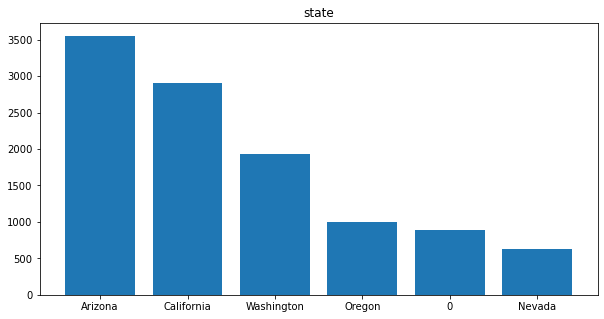

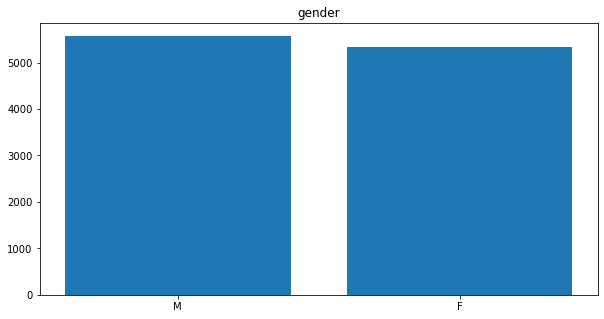

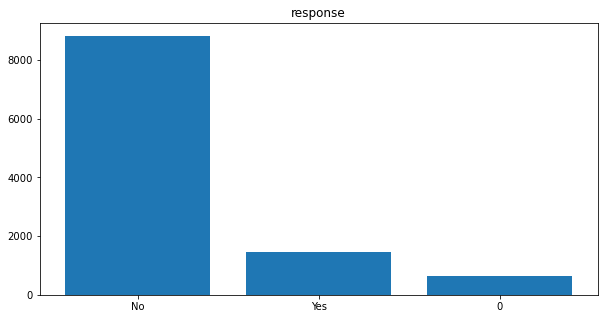

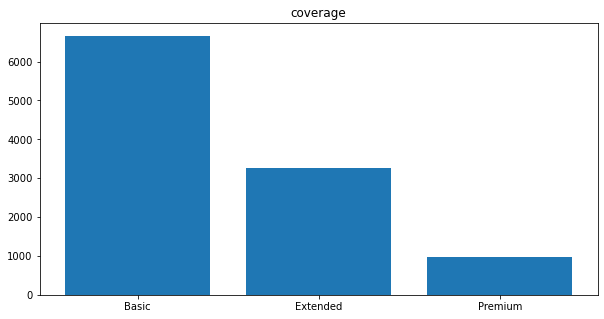

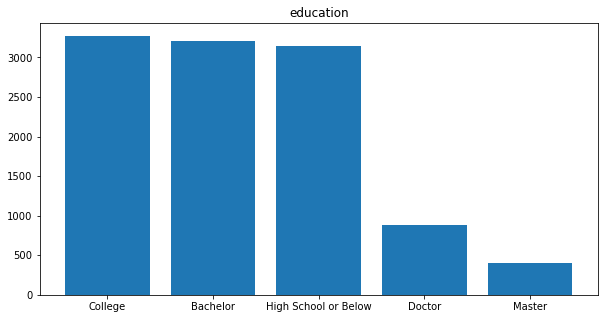

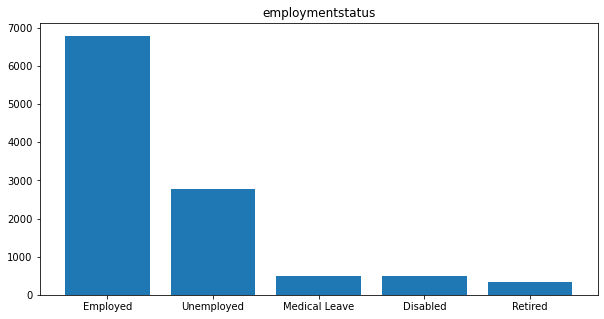

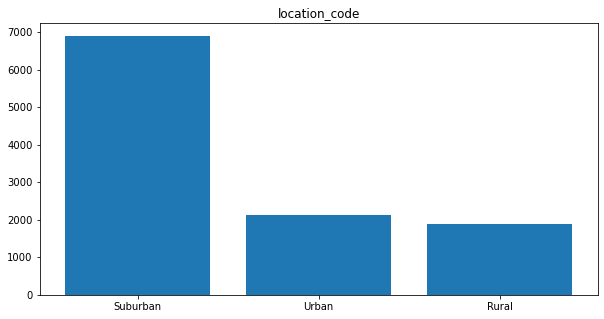

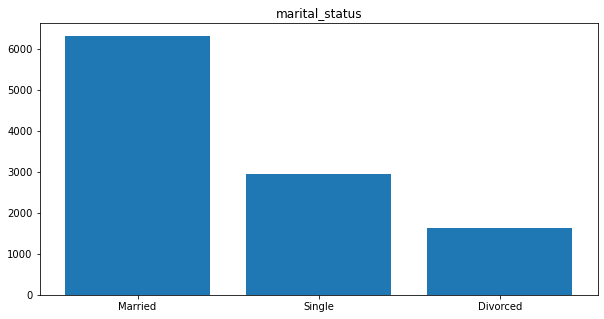

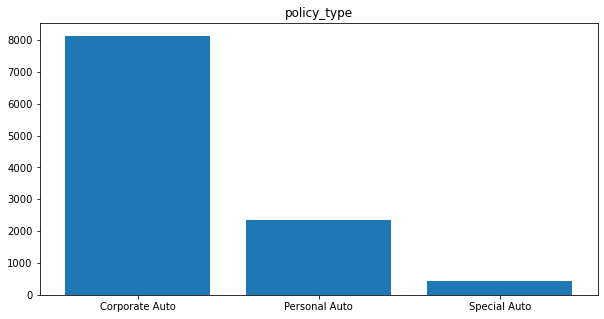

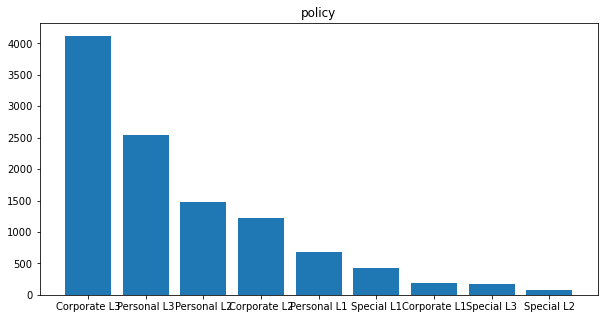

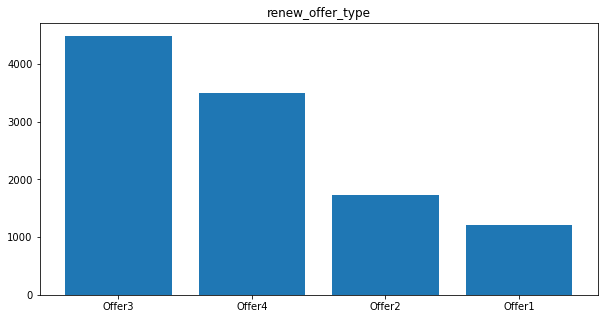

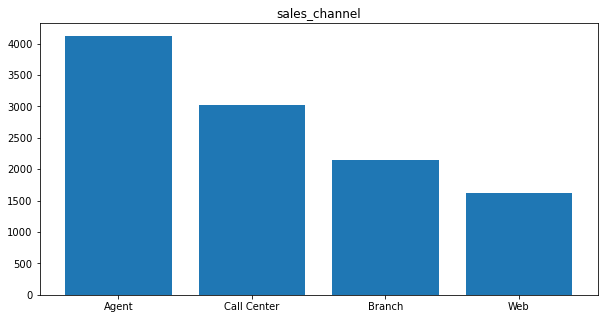

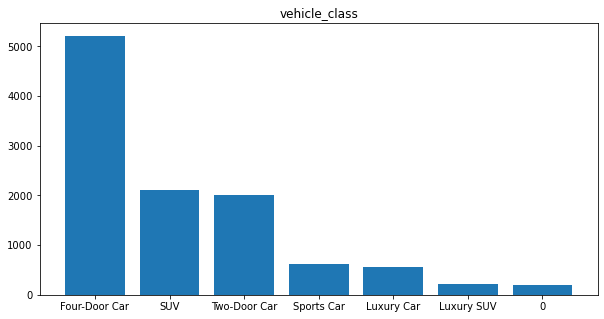

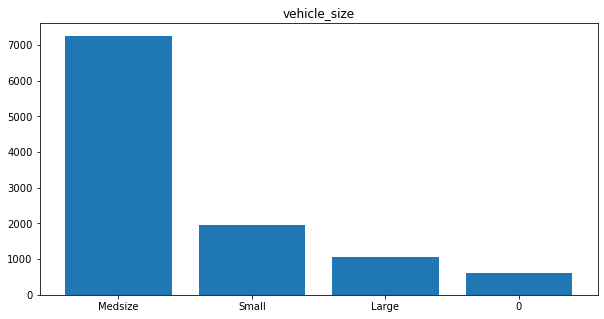

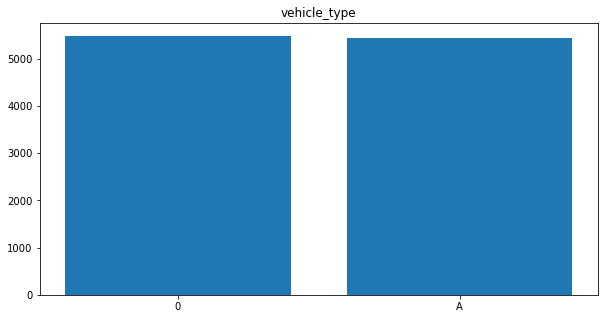

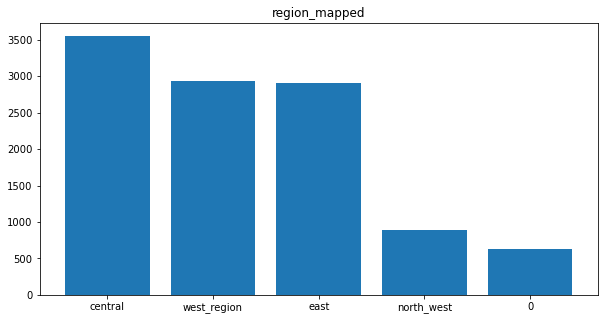

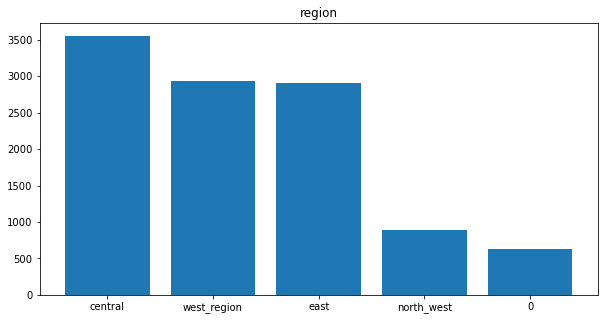

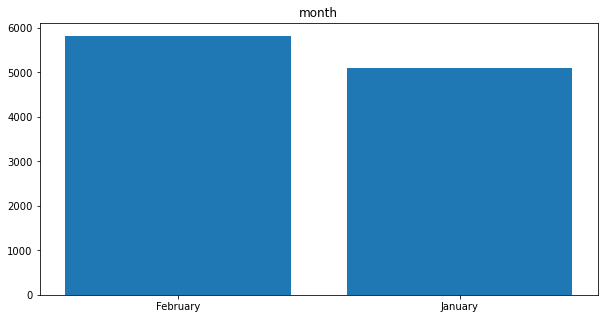

In [318]:
for c in cs_df.select_dtypes(object):
    plt.figure(figsize=(10,5))
    plt.bar(cs_df[c].unique(), cs_df[c].value_counts())
    plt.title(c)
    plt.show()

C:\Users\admin\anaconda3\envs\DA_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


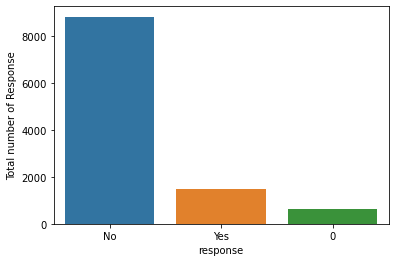

In [261]:
# show a plot of the total number of responses

sns.countplot('response', data=cs_df)
plt.ylabel('Total number of Response')
plt.show()

In [87]:
# total number of responses alternative

# calculation

recieved_responses = cs_df['response'].value_counts()       #count the Yes/No responses
no_responses = pd.Series(cs_df['response'].isna().sum())    #count the null values

#no_responses = pd.Series([len(df) - df['response'].value_counts().sum()])  <-- another way to count the nulls

total_responses = recieved_responses.append(no_responses) 
total_responses.index = ['No', 'Yes', 'no-Response']     #renaming the series index

<AxesSubplot:title={'center':'total number of responses'}>

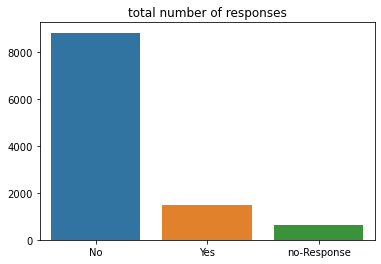

In [88]:
fig1, ax1 = plt.subplots()

ax1.set_title("total number of responses")
sns.barplot(x = total_responses.index, y = total_responses)

C:\Users\admin\anaconda3\envs\DA_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


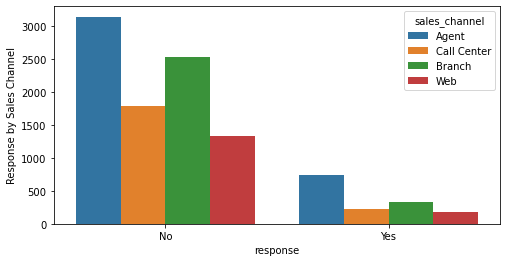

In [78]:
# response rate by the sales channels

plt.figure(figsize=(8,4))
sns.countplot('response', hue='sales_channel', data=cs_df)
plt.ylabel('Response by Sales Channel')
plt.show()



In [83]:
# response rate by the sales channels alternative

# calculation

response_rate = cs_df.groupby(['response','sales_channel']).size().reset_index(name ='counts')

# count() shows the grouping for all columns
# size just for those mentioned in the groupby

<AxesSubplot:title={'center':'response rate by sales_channels'}, xlabel='sales_channel', ylabel='counts'>

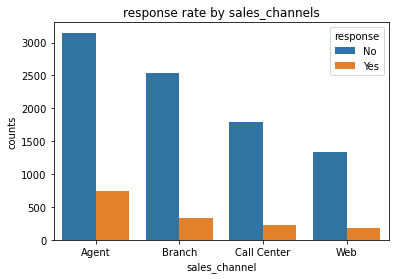

In [84]:
fig2, ax2 = plt.subplots()

ax2.set_title('response rate by sales_channels')
sns.barplot(x = response_rate['sales_channel'], y = response_rate['counts'], hue = response_rate['response'])

In [91]:
# response rate by income 
# caculation

response_income = cs_df.groupby(['response', 'income']).size().reset_index()
response_income = response_income.replace(0,np.nan)     #replaceing zeros with null
response_income.dropna(inplace = True)                  #removing null

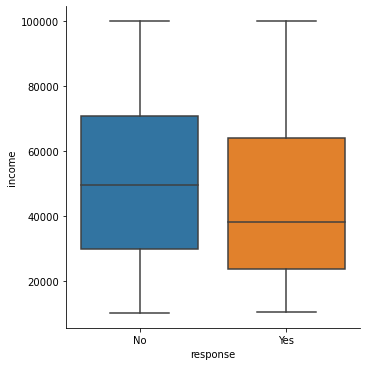

In [92]:
sns.catplot(x = 'response', y = 'income', data = response_income, kind= "box")

In [94]:
# correlation heatmap

# calculation to make diagonals zero

core_df = cs_df.corr()
corr_matrix = np.array(core_df)
unit_matrix = np.eye(8)    #corr_matrix.shape --> 8
correlation = corr_matrix - unit_matrix

<AxesSubplot:>

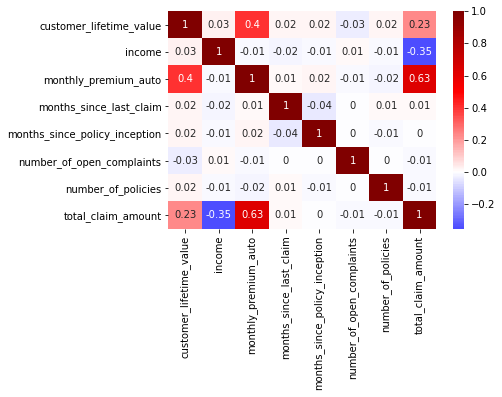

In [95]:
#corr_map = sns.heatmap(correlation)      
#the diagonal values are zero

sns.heatmap(round(cs_df.corr(),2), annot = True, cmap="seismic", center = 0)

## Activity 5 - Data Transformation

#### Get the numeric data into dataframe called numerical

In [262]:
numerical =cs_df._get_numeric_data()
#numerical = df.select_dtypes(include=np.number)
numerical

,customer_lifetime_value,number_of_open_complaints,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount
0,4809.0,0.0,48029.0,61,7.0,52,9,293.0
1,2229.0,0.0,0.0,64,3.0,26,1,745.0
2,14948.0,0.0,22139.0,100,34.0,31,2,480.0
3,22332.0,0.0,49078.0,97,10.0,3,2,484.0
4,9025.0,0.0,23675.0,117,15.0,31,7,708.0
...,...,...,...,...,...,...,...,...
10905,15563.0,0.0,0.0,253,15.0,40,7,1214.0
10906,5259.0,0.0,61146.0,65,7.0,68,6,273.0
10907,23893.0,0.0,39837.0,201,11.0,63,2,381.0
10908,11972.0,4.0,64195.0,158,0.0,27,6,618.0


In [263]:
cs_df['customer_lifetime_value'].dtypes

dtype('float64')

#### Get the categorial data into dataframe called numerical

In [264]:
categorical = cs_df.select_dtypes(include=np.object)
categorical

<ipython-input-264-27e577325329>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = cs_df.select_dtypes(include=np.object)


,state,gender,response,coverage,education,employmentstatus,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type,region_mapped,region,month
0,Arizona,M,No,Basic,College,Employed,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,0,central,central,February
1,California,F,No,Basic,College,Unemployed,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,0,west_region,west_region,January
2,Washington,M,No,Basic,Bachelor,Employed,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A,east,east,February
3,Oregon,M,Yes,Extended,College,Employed,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A,north_west,north_west,January
4,Oregon,F,No,Premium,Bachelor,Medical Leave,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,0,north_west,north_west,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,F,No,Premium,Bachelor,Unemployed,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A,central,central,January
10906,Oregon,F,No,Basic,College,Employed,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A,north_west,north_west,January
10907,Arizona,F,No,Extended,Bachelor,Employed,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,0,central,central,February
10908,California,F,No,Premium,College,Employed,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A,west_region,west_region,February


#### Check the normality of numerical variables visually

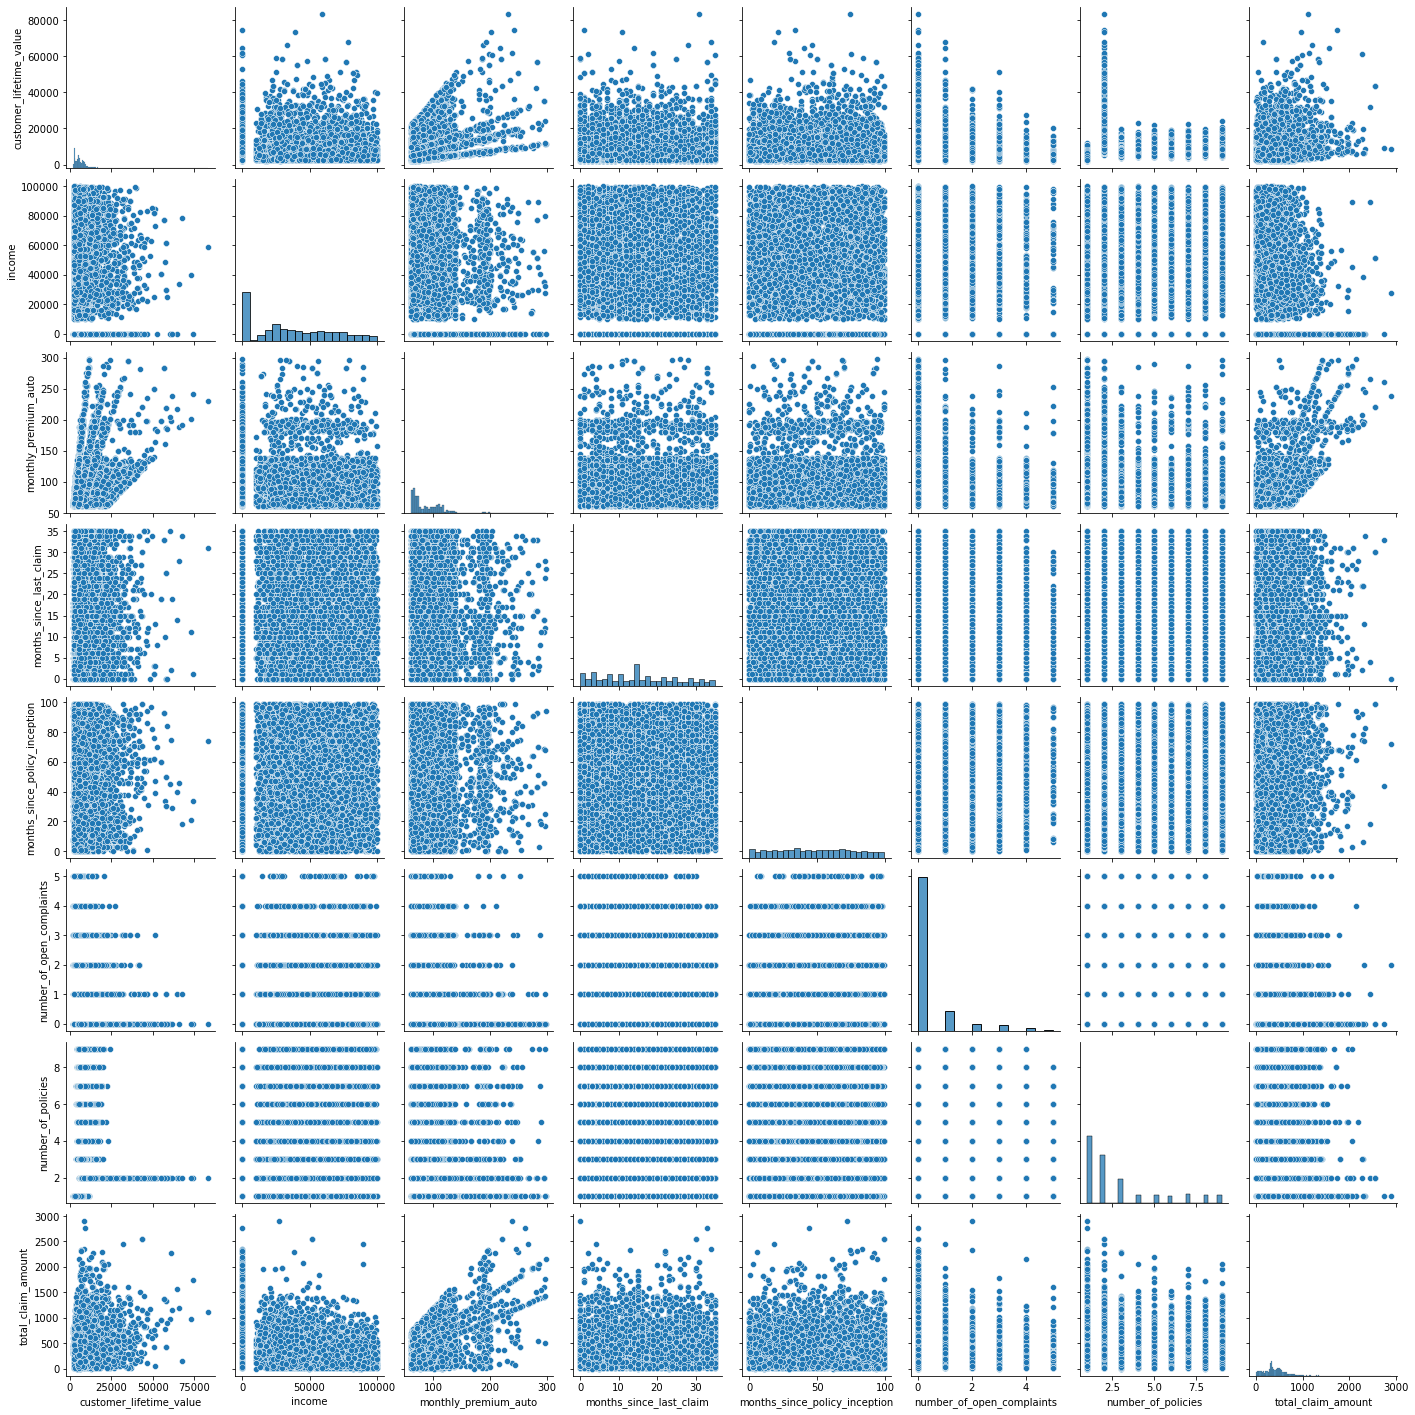

In [100]:
sns.pairplot(cs_df)
plt.show()

C:\Users\admin\anaconda3\envs\DA_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Density'>

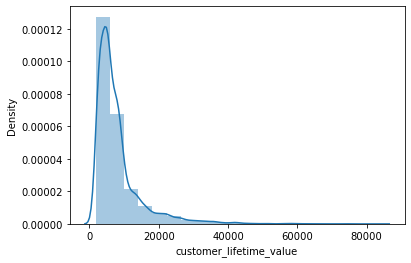

In [265]:
sns.distplot((cs_df['customer_lifetime_value']), bins=20)

<AxesSubplot:ylabel='Count'>

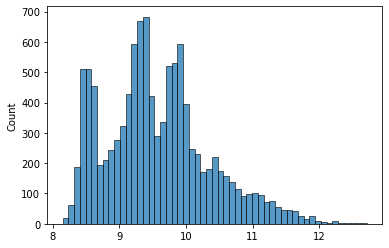

In [266]:
monthly=boxcox(cs_df['customer_lifetime_value'],lmbda=0.02)
sns.histplot(monthly)

C:\Users\admin\anaconda3\envs\DA_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='monthly_premium_auto', ylabel='Density'>

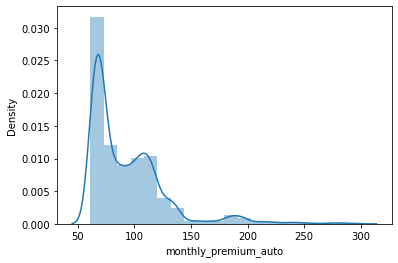

In [115]:
sns.distplot((cs_df['monthly_premium_auto']), bins=20)

<AxesSubplot:ylabel='Count'>

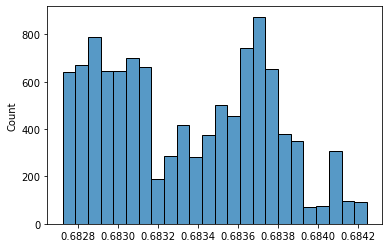

In [121]:
monthly,lam=boxcox(cs_df['monthly_premium_auto'])
sns.histplot(monthly)

In [106]:
numerical.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,15.140422,48.091934,0.361962,2.979193,434.888330
std,6885.081434,30359.195670,34.442532,9.783582,27.940675,0.890134,2.399359,292.180556
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527
50%,5771.147235,33813.500000,83.000000,15.000000,48.000000,0.000000,2.000000,382.564630
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


C:\Users\admin\anaconda3\envs\DA_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


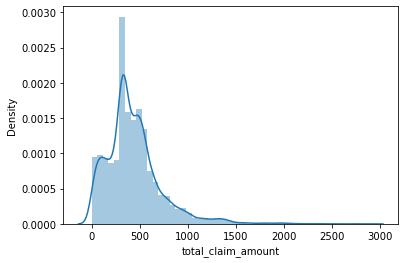

In [107]:
sns.distplot(cs_df.total_claim_amount, hist = True)
plt.show()

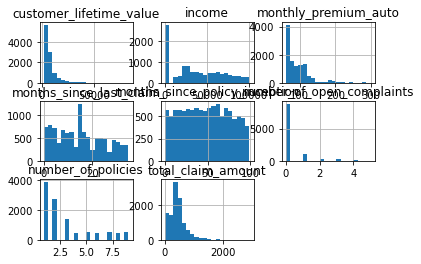

In [113]:
numerical = cs_df.hist(bins=20)

#### Normalize with MinMaxScaler

In [108]:
min_max_scaler = preprocessing.MinMaxScaler()
numerical_scaled = min_max_scaler.fit_transform(numerical)
cs_normalized = pd.DataFrame(numerical_scaled)
cs_normalized

,0,1,2,3,4,5,6,7
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,0.101171
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.257445
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,0.165875
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.167263
4,0.087527,0.236795,0.236287,0.428571,0.313131,0.0,0.750,0.244657
...,...,...,...,...,...,...,...,...
10905,0.167823,0.000000,0.810127,0.428571,0.404040,0.0,0.750,0.419717
10906,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625,0.094333
10907,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125,0.131763
10908,0.123717,0.642072,0.409283,0.000000,0.272727,0.8,0.625,0.213674


<AxesSubplot:xlabel='monthly_premium_auto', ylabel='total_claim_amount'>

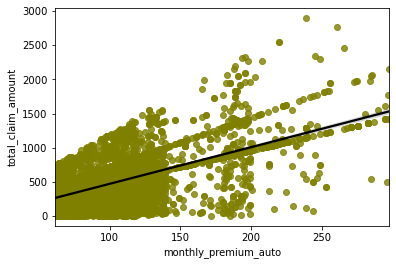

In [124]:
# Check regression 

sns.regplot(x='monthly_premium_auto',y='total_claim_amount', data=cs_df, scatter_kws={"color": "olive"}, line_kws={"color": "black"})

#### Checking Multicorrelinilaty

In [109]:
correlations = numerical.corr()
print(correlations)

                               customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.028306   
income                                        0.028306  1.000000   
monthly_premium_auto                          0.403069 -0.009788   
months_since_last_claim                       0.015708 -0.023073   
months_since_policy_inception                 0.016960 -0.005903   
number_of_open_complaints                    -0.030616  0.008425   
number_of_policies                            0.016024 -0.009960   
total_claim_amount                            0.232626 -0.354141   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.403069                 0.015708   
income                                    -0.009788                -0.023073   
monthly_premium_auto                       1.000000                 0.008502   
months_since_last_claim                    0.008502                

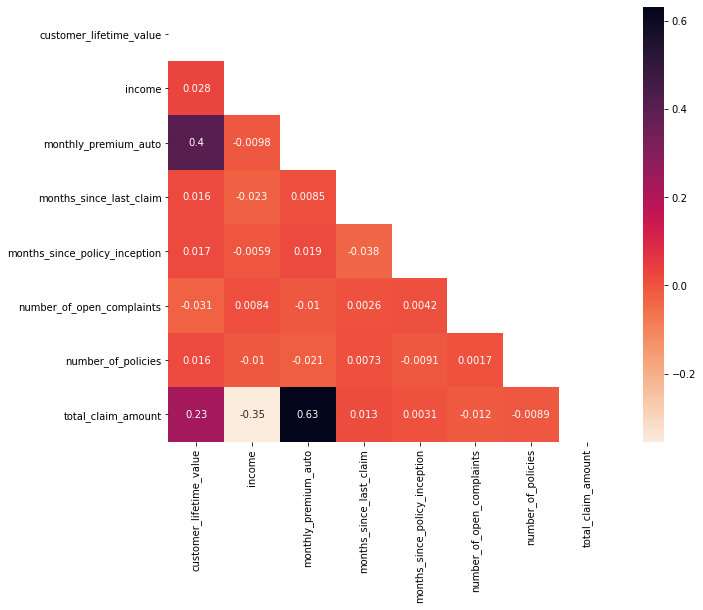

In [110]:
cmap = sns.cm.rocket_r  ## for reversing the colors
mask=np.zeros_like(numerical.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(10, 8))
ax=sns.heatmap(numerical.corr(), mask=mask, annot=True,cmap=cmap)
plt.show()

#### Categorical Variables Transformation

#### One Hot Encoder

In [126]:
enc = OneHotEncoder (handle_unknown='ignore')
enc.fit_transform(np.array(cs_df.loc[:,["policy_type","marital_status"]])).toarray()

array([[1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 1.]])

In [129]:
pd.get_dummies(categorical.policy_type)

,Corporate Auto,Personal Auto,Special Auto
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
10905,0,1,0
10906,0,1,0
10907,1,0,0
10908,0,1,0


In [127]:
# we need two dimensial array. So choose also a second column/variable 

# If only one, we need to reshape,e.g. with numpy.reshape
# https://numpy.org/doc/stable/reference/generated/numpy.reshape.html?highlight=reshape

In [128]:
# Solution for only one column. Needs to be reshaped

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = [['Corporate Auto'], ['Personal Auto'], ['Special Auto']]
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)
inverted_2 = label_encoder.inverse_transform([argmax(onehot_encoded[1, :])])
print(inverted_2)
inverted_3 = label_encoder.inverse_transform([argmax(onehot_encoded[2, :])])
print(inverted_3)

[['Corporate Auto']
 ['Personal Auto']
 ['Special Auto']]
[0 1 2]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
['Corporate Auto']
['Personal Auto']
['Special Auto']


C:\Users\admin\anaconda3\envs\DA_env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## Activity 6 Modelling

#### Processing Data

#### X-Y Split:     Splitting the target variable from the dependent variables

#### For total_claim_amount

In [267]:
X=cs_df.drop('total_claim_amount', axis=1)
y=cs_df.total_claim_amount

# we drop some useless columns
X=X.drop(columns=['effective_to_date'])

##### Get numerical features/ variables/ columns

In [268]:
numerical_features =X._get_numeric_data()
# numerical =data.select_dtypes(np.number)
numerical_features.head()

,customer_lifetime_value,number_of_open_complaints,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies
0,4809.0,0.0,48029.0,61,7.0,52,9
1,2229.0,0.0,0.0,64,3.0,26,1
2,14948.0,0.0,22139.0,100,34.0,31,2
3,22332.0,0.0,49078.0,97,10.0,3,2
4,9025.0,0.0,23675.0,117,15.0,31,7


#### Normalize Numerical Values

In [ ]:
# Normalize with MinMaxScaler already done above 

#### Get categorical features/ variables/ columns¶

In [269]:
categorical_features = X.select_dtypes(object)
categorical_features.head()

,state,gender,response,coverage,education,employmentstatus,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type,region_mapped,region,month
0,Arizona,M,No,Basic,College,Employed,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,0,central,central,February
1,California,F,No,Basic,College,Unemployed,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,0,west_region,west_region,January
2,Washington,M,No,Basic,Bachelor,Employed,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A,east,east,February
3,Oregon,M,Yes,Extended,College,Employed,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A,north_west,north_west,January
4,Oregon,F,No,Premium,Bachelor,Medical Leave,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,0,north_west,north_west,January


#### Categorical Variables Transformation

In [ ]:
# With OneHotEncoder 
# Already done above for some values

In [146]:
# pd.DataFrame(OneHotEncoder(drop='first').fit_transform(categoricals_features).toarray(),
# columns=OneHotEncoder(drop='first').fit(categoricals_features).get_feature_names(input_features=categoricals_features.columns)).head()

In [270]:
# get dummies pandas
categoricals_features=pd.get_dummies(categorical_features, drop_first=True)

#### Concatinating Data Frames

In [271]:
# Merging the encoded results into the original data frame
# Concat the numerical (normalized/transformed) and categorical (normalized/transformed)

all_features=pd.concat([numerical_features, categorical_features], axis=1) 
all_features.head()

,customer_lifetime_value,number_of_open_complaints,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,state,gender,response,coverage,education,employmentstatus,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type,region_mapped,region,month
0,4809.0,0.0,48029.0,61,7.0,52,9,Arizona,M,No,Basic,College,Employed,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,0,central,central,February
1,2229.0,0.0,0.0,64,3.0,26,1,California,F,No,Basic,College,Unemployed,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,0,west_region,west_region,January
2,14948.0,0.0,22139.0,100,34.0,31,2,Washington,M,No,Basic,Bachelor,Employed,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A,east,east,February
3,22332.0,0.0,49078.0,97,10.0,3,2,Oregon,M,Yes,Extended,College,Employed,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A,north_west,north_west,January
4,9025.0,0.0,23675.0,117,15.0,31,7,Oregon,F,No,Premium,Bachelor,Medical Leave,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,0,north_west,north_west,January


In [152]:
# alternative 
# pd.concat([input_data,pd.DataFrame(enc.fit_transform(input_data).toarray())],axis=1).iloc[:,2:]

## Linear Regression

#### Split data to Train and Test Sets

In [272]:
# Train set 80% Test set 20% of the total data
# We make predictions on the test set 

X_train, X_test, y_train, y_test=train_test_split(cs_df.total_claim_amount, y, test_size=0.20)

In [273]:
X_train

8396     442.0
3494     331.0
5022     411.0
5979     322.0
10037    355.0
         ...  
4121     408.0
10823    317.0
10095    191.0
2431     424.0
4268     648.0
Name: total_claim_amount, Length: 8728, dtype: float64

In [274]:
X_test

8474    100.0
3936     11.0
9337    252.0
7128    312.0
5477    368.0
        ...  
4810    831.0
9791    336.0
4976    296.0
8707    177.0
916     127.0
Name: total_claim_amount, Length: 2182, dtype: float64

#### Apply Linear Regression

In [278]:
model=LinearRegression()   
model.fit(X_train.array.reshape(-1, 1), y_train)  
y_pred=model.predict(X_test.array.reshape(-1, 1)) 
y_pred_train=model.predict(X_train.array.reshape(-1, 1))

#### Scatter Plot Predict vs Real 

Text(0.5, 1.0, 'Train Residual Histogram')

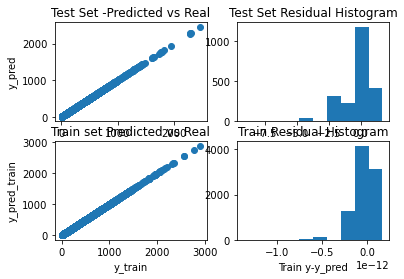

In [291]:
# y_pred vs y
fig, ax = plt.subplots(2,2)
ax[0,0].plot(y_pred, y_test, 'o')
ax[0,0].set_xlabel("y_test")
ax[0,0].set_ylabel("y_pred")
ax[0,0].set_title("Test Set -Predicted vs Real")

# residuals y - y_pred.

ax[0,1].hist(y_test - y_pred)
ax[0,1].set_xlabel("Test y-y_pred")
ax[0,1].set_title("Test Set Residual Histogram")

ax[1,0].plot(y_pred_train, y_train, 'o')
ax[1,0].set_xlabel("y_train")
ax[1,0].set_ylabel("y_pred_train")
ax[1,0].set_title("Train set Predicted vs Real")

# residuals y - y_pred.  

ax[1,1].hist(y_train - y_pred_train)
ax[1,1].set_xlabel("Train y-y_pred")
ax[1,1].set_title("Train Residual Histogram")

#### Model Validation


MSE - Mean Squared Error

In [293]:
from sklearn.metrics import mean_squared_error as mse
train_mse=mse(model.predict(X_train.array.reshape(-1, 1)), y_train)
test_mse=mse(model.predict(X_test.array.reshape(-1, 1)), y_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 1.7846639434246944e-26 -- test MSE: 1.7439353273922159e-26


RSME - Root Mean Squared Error 

In [294]:
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 1.3359131496563294e-13 -- test RMSE: 1.3205814353504352e-13


MAE - Mean Absolute Error 

In [295]:
from sklearn.metrics import mean_absolute_error as mae
train_mae=mae(model.predict(X_train.array.reshape(-1, 1)), y_train)
test_mae=mae(model.predict(X_test.array.reshape(-1, 1)), y_test)

print ('train MAE: {} -- test MAE: {}'.format(train_mse, test_mse))

train MAE: 1.7846639434246944e-26 -- test MAE: 1.7439353273922159e-26


R2

In [296]:
r2= model.score(X_test.array.reshape(-1, 1), y_test)

In [297]:
print ('train R2: {} -- test R2: {}'.format(model.score(X_train.array.reshape(-1, 1), y_train),
                                            model.score(X_test.array.reshape(-1, 1), y_test)))

train R2: 1.0 -- test R2: 1.0


Adjusted R2

In [298]:
N=X_train.shape[0]
p=1
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  1.0


#### Feature Importance

In [ ]:
# In case we have multiple features for X 

In [300]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train,
    'Importance': model.coef_[0]
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [301]:
features_importances

,Attribute,Importance
8396,442.0,1.0
6895,142.0,1.0
6335,336.0,1.0
7527,205.0,1.0
7236,113.0,1.0
...,...,...
920,257.0,1.0
1868,504.0,1.0
2151,389.0,1.0
4129,520.0,1.0


### For monthly_premium_auto

#### Split data to Train and Test Sets

In [306]:
X=cs_df.drop('monthly_premium_auto', axis=1)
y=cs_df.monthly_premium_auto

In [307]:
X_train, X_test, y_train, y_test=train_test_split(cs_df.monthly_premium_auto, y, test_size=0.20)

In [308]:
X_train

2576      82
9057      61
3792     209
4492     124
8881      72
        ... 
6682     105
10899    111
2763      71
7068      62
7424     118
Name: monthly_premium_auto, Length: 8728, dtype: int64

#### Apply Linear Regression

In [309]:
model=LinearRegression()   
model.fit(X_train.array.reshape(-1, 1), y_train)  
y_pred=model.predict(X_test.array.reshape(-1, 1)) 
y_pred_train=model.predict(X_train.array.reshape(-1, 1))

#### Scatter Plot Predict vs Real

Text(0.5, 1.0, 'Train Residual Histogram')

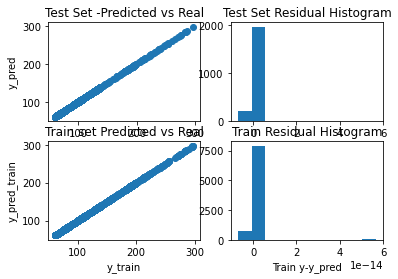

In [310]:
# y_pred vs y
fig, ax = plt.subplots(2,2)
ax[0,0].plot(y_pred, y_test, 'o')
ax[0,0].set_xlabel("y_test")
ax[0,0].set_ylabel("y_pred")
ax[0,0].set_title("Test Set -Predicted vs Real")

# residuals y - y_pred.

ax[0,1].hist(y_test - y_pred)
ax[0,1].set_xlabel("Test y-y_pred")
ax[0,1].set_title("Test Set Residual Histogram")

ax[1,0].plot(y_pred_train, y_train, 'o')
ax[1,0].set_xlabel("y_train")
ax[1,0].set_ylabel("y_pred_train")
ax[1,0].set_title("Train set Predicted vs Real")

# residuals y - y_pred.  

ax[1,1].hist(y_train - y_pred_train)
ax[1,1].set_xlabel("Train y-y_pred")
ax[1,1].set_title("Train Residual Histogram")

#### Model Validation

MSE - Mean Squared Error

In [311]:
from sklearn.metrics import mean_squared_error as mse
train_mse=mse(model.predict(X_train.array.reshape(-1, 1)), y_train)
test_mse=mse(model.predict(X_test.array.reshape(-1, 1)), y_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 1.7104760379384285e-29 -- test MSE: 2.1055572465660736e-29


RSME - Root Mean Squared Error 

In [312]:
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 4.135790175937881e-15 -- test RMSE: 4.588635141919734e-15


MAE - Mean Absolute Error

In [313]:
from sklearn.metrics import mean_absolute_error as mae
train_mae=mae(model.predict(X_train.array.reshape(-1, 1)), y_train)
test_mae=mae(model.predict(X_test.array.reshape(-1, 1)), y_test)

print ('train MAE: {} -- test MAE: {}'.format(train_mse, test_mse))

train MAE: 1.7104760379384285e-29 -- test MAE: 2.1055572465660736e-29


R2

In [314]:
r2= model.score(X_test.array.reshape(-1, 1), y_test)

In [315]:
print ('train R2: {} -- test R2: {}'.format(model.score(X_train.array.reshape(-1, 1), y_train),
                                            model.score(X_test.array.reshape(-1, 1), y_test)))

train R2: 1.0 -- test R2: 1.0


Adjusted R2

In [316]:
N=X_train.shape[0]
p=1
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  1.0
